# 目的
1-4で作成したデータセットを使って遊ぶ
MEMO2 encoding="utf_8_sig"をつけるとcsvにした際の文字化けを防ぐことができる

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("/home/yosuke-kurosu/pj09_10％/sauna_0930.csv")

In [6]:
df.to_csv("sauna_encoding.csv", encoding='utf_8_sig')

In [74]:
# 男サウナの温度が欠損しているデータを除く
df = df[df["男サウナ"]!="?"]
df = df[df["男サウナ"]!="-"]
df = df[df["男水風呂"]!="?"]
df = df[df["男水風呂"]!="-"]

In [75]:
saunatemp = []
for i in df["男サウナ"].values:
    saunatemp.append(float(i))

In [76]:
mizutemp = []
for k in df["男水風呂"].values:
    mizutemp.append(float(k)) 

In [77]:
df.columns

Index(['サウナ名', 'イキタイ', 'サ活', 'target', '男サウナ', '男水風呂', '女サウナ', '女水風呂', '男ロウリュ',
       '男オート', '男セルフ', '男外気浴', '男休憩', '男イオン', '女ロウリュ', '女オート', '女セルフ', '女外気浴',
       '女休憩', '女イオン'],
      dtype='object')

## イキタイ度を解析

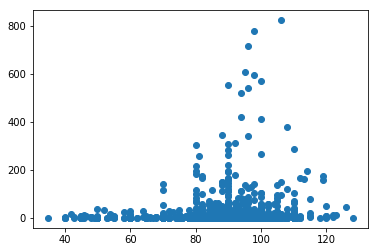

In [78]:
plt.scatter(saunatemp, df["イキタイ"])
#plt.scatter(mizutemp, df["イキタイ"])

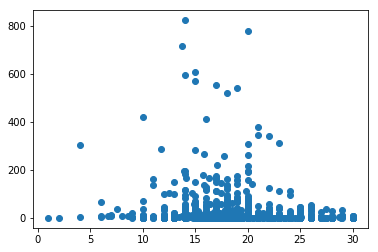

In [35]:
plt.scatter(mizutemp, df["イキタイ"])

In [63]:
df[df["イキタイ"]>750]

,サウナ名,イキタイ,サ活,target,男サウナ,男水風呂,女サウナ,女水風呂,男ロウリュ,男オート,男セルフ,男外気浴,男休憩,男イオン,女ロウリュ,女オート,女セルフ,女外気浴,女休憩,女イオン
70,上野サウナ&カプセルホテル北欧,823,2754,男性専用,106,14,?,?,ng,ng,ng,ok,ok,ok,-,-,-,-,-,-
1554,天空のアジト マルシンスパ,780,2097,男性専用,98,20,?,?,ok,ng,ok,ok,ok,ok,-,-,-,-,-,-


In [79]:
# サウナの温度-水風呂の温度特徴量を作成
diff = np.array(saunatemp)-np.array(mizutemp)

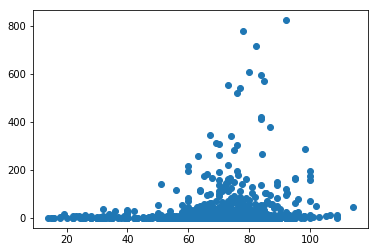

In [37]:
plt.scatter(diff, df["イキタイ"])

## サ活を調べる

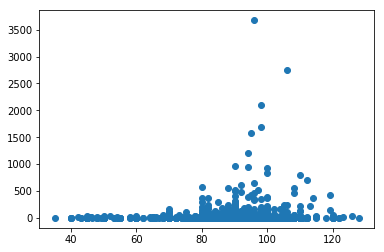

In [41]:
plt.scatter(saunatemp, df["サ活"])

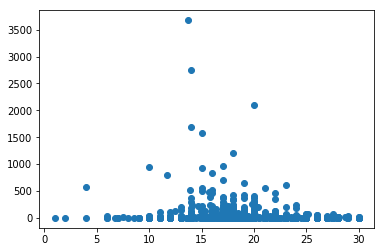

In [42]:
plt.scatter(mizutemp, df["サ活"])

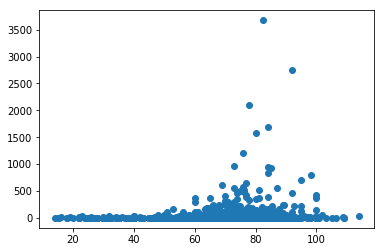

In [83]:
plt.scatter(diff, df["サ活"])

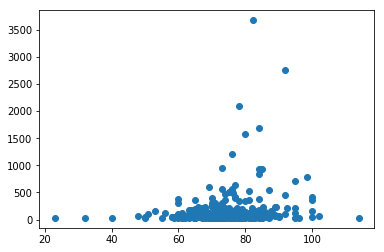

In [92]:
idxes = df['サ活'].values > 30
plt.scatter(diff[idxes], df["サ活"].values[idxes])

## イキタイ度とサ活の相関を見てみる

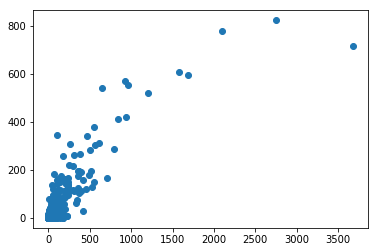

In [48]:
plt.scatter(df["サ活"], df["イキタイ"])

In [69]:
df = df["男ロウリュ"].replace("ng",0)
df = df["男ロウリュ"].replace("ok",0)

KeyError: '男ロウリュ'

In [70]:
df

0       0
1       0
2       0
5       0
6       0
7       0
9       0
11      0
13      0
14      0
15      0
16      0
19      0
20      0
22      0
23      0
24      0
26      0
28      0
30      0
31      0
32      0
34      0
35      0
39      0
40      0
41      0
42      0
43      0
44      0
       ..
4669    0
4671    0
4675    0
4677    0
4678    0
4679    0
4682    0
4685    0
4686    0
4691    0
4692    0
4693    0
4694    0
4695    0
4696    0
4697    0
4699    0
4701    0
4702    0
4703    0
4704    0
4705    0
4706    0
4707    0
4709    0
4711    0
4713    0
4722    0
4726    0
4727    0
Name: 男ロウリュ, Length: 2698, dtype: object

In [52]:
df.to_csv("sauna_man_0930.csv", encoding='utf_8_sig')